# Spreading Out
Drop of food dye in a cup of water that slowly spreads in all directions until all of the liquid is the color of the dye.  Diffusion spreads it around but it is not directional.  We need numerical methods that are isotropic.

## Parabolic PDEs

1D Diffusion equation.  Main feature: Second-order derivative in space.
$$\frac{\partial u}{\partial t} = \alpha \frac{\partial ^2 u}{\partial x^2}$$

## Heat Conduction

Diffusive process.  Heat equation in one spatial dimension:
$$\frac{\partial T}{\partial t} = \alpha \frac{\partial ^2 T}{\partial x^2}$$

Where $\alpha$ is the thermal diffusivity which is a property of the material and $T$ is the temperature.

In Mod2_Les3 we discretized the diffusion equation with a forward time, and centered space scheme which was subject to the following stability constraint:
$$\alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}$$

Gotta look at a 1D temperature evolution problem

### Problem set up

We have a graphite rod with a thermal diffusivity $\alpha = 1.22 x 10^{-3} m^2/s$ at length $L = 1m$ and temperature $T = 0^{\circ} C$ everywhere.  At time $t = 0$, we raise the temperature on the left-side end, $x = 0$ to $T = 100^{\circ} C$ and hold it there. How will the temperature evolve in the rod?

We will begin with a spatial grid of 51 points and using 100 time steps with a forward time/centered space scheme.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
#Initial Conditions
L = 1
nt = 100
nx = 51
alpha = 1.22e-3

dx = L/(nx-1)

Ti = numpy.zeros(nx)
Ti[0] = 100

Forward-time, Centered-space discretization
$$\frac{T_i ^{n+1} - T_i ^n}{\Delta t} = \alpha \frac{T_{i+1} ^n - 2T_i ^n + T_{i-1} ^n}{\Delta x^2}$$

To obtain the temperature at the next time step $T_i ^{n+1}$ from the known information at the current time step we get:
$$T_i ^{n+1} = T_i ^n + \frac{\alpha \Delta t}{\Delta x^2} (T_{i+1} ^n - 2T_i ^n + T_{i-1} ^n)$$

In [3]:
def ftcs(T, nt, dt, dx, alpha):
    """Solves the diffusion equation with forward-time, centererd scheme
    
    Parameters
    ----------
    T : array of float
        Initial temperature profile
    nt : int
        Number of time steps
    dt : float
        Time step size
    dx : float
        Mesh size
    alpha : float
        Diffusion coefficient (thermal diffusivity)
        
    Returns:
    -------
    T : array of float
        Temperature profile after nt time steps with a forward in the time scheme
    """
    for n in range(nt):
        Tn = T.copy()
        T[1:-1] = Tn[1:-1] + alpha * dt / dx ** 2 * (Tn[2:] - 2 * Tn[1:-1] + Tn[0:-2])
        
    return T

In [4]:
sigma = 1/2.0
dt = sigma * dx * dx / alpha
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

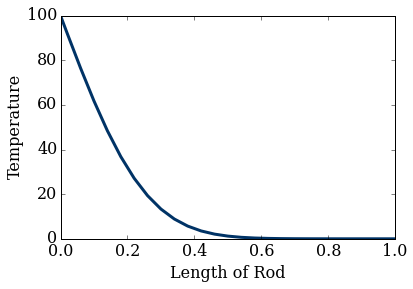

In [5]:
pyplot.plot(numpy.linspace(0, 1, nx), T, color = '#003366', ls = '-', lw = 3)
pyplot.ylim(0, 100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');

## Boundary Conditions

We stated that the left-hand side of the rod is held to a temp of $T = 100^{\circ} C$.  This is an example of a boundary condition which is a rule that defines how the problem interacts with the borders of the domain.  In the case of this problem the domain spans the length of the rod from $0 \leq x \leq 1$

### Dirichlet Boundary

The rod example uses a Dirichlet BC on the left hand side.

**Dirlichlet boundary** : the border is held to a specific value of the solution variable.

What about the ride hand end?  In the discretization we set up the problem hasn't evolved for long enough time for the heat to travel the full length of the rod.  Let's increase the number of timesteps and see what hip-happens.

In [6]:
nt = 1000
T = ftcs(Ti.copy(), nt, dt, dx, alpha)

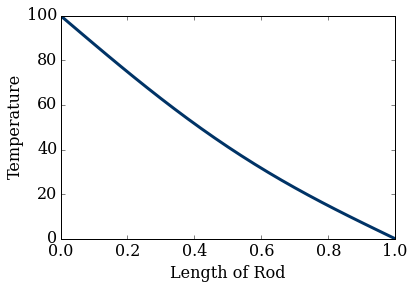

In [7]:
pyplot.plot(numpy.linspace(0, 1, nx), T, color = '#003366', ls = '-', lw = 3)
pyplot.ylim(0, 100)
pyplot.xlabel('Length of Rod')
pyplot.ylabel('Temperature');